# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# <Student to fill this section>
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
# Import custom package
!pip install my_krml_25552249==2025.0.7.0

---
## A. Project Description


In [5]:
# <Student to fill this section>
student_name = "Shawya Saito"
student_id = "25552240"

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [8]:
# <Student to fill this section>
business_use_case_description = """
Explain clearly what is the goal of this project for the business.
"""

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
# <Student to fill this section>
business_objectives = """
What will be the impact of accurate or incorrect results?
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [14]:
# Load data
df = pd.read_csv("../../data/raw/sydney_weather_2010_2024.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          5479 non-null   object 
 1   weather_code                  5479 non-null   float64
 2   temperature_2m_mean           5479 non-null   float64
 3   temperature_2m_max            5479 non-null   float64
 4   temperature_2m_min            5479 non-null   float64
 5   apparent_temperature_mean     5479 non-null   float64
 6   apparent_temperature_max      5479 non-null   float64
 7   apparent_temperature_min      5479 non-null   float64
 8   precipitation_sum             5479 non-null   float64
 9   rain_sum                      5479 non-null   float64
 10  snowfall_sum                  5479 non-null   float64
 11  precipitation_hours           5479 non-null   float64
 12  wind_speed_10m_max            5479 non-null   float64
 13  win

Change date as a date datatype

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
display(df.head(), df.tail())

,date,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,...,surface_pressure_max,surface_pressure_min,winddirection_10m_dominant,wind_gusts_10m_mean,wind_speed_10m_mean,wind_gusts_10m_min,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min
0,2009-12-31 14:00:00+00:00,53.0,22.964250,25.670502,21.070500,25.151611,26.715890,24.240880,3.9,3.9,...,1008.16705,1003.63450,331.647500,21.330000,10.419551,7.200000,4.072935,20.643309,21.304327,19.931772
1,2010-01-01 14:00:00+00:00,63.0,23.612165,26.920502,20.970500,26.942467,32.614998,22.179842,8.6,8.6,...,1005.03217,998.06805,298.610300,26.010002,8.355687,15.119999,1.297998,21.520597,23.316803,19.692732
2,2010-01-02 14:00:00+00:00,51.0,19.882996,20.620499,19.470500,19.709002,21.280840,19.180962,1.1,1.1,...,1013.45440,1005.12430,146.744640,28.275000,12.964748,12.959999,6.915374,16.673801,19.032654,15.879213
3,2010-01-03 14:00:00+00:00,51.0,20.887167,22.520500,19.220500,21.016272,22.343325,19.466248,0.6,0.6,...,1014.66760,1011.22390,69.884770,23.565000,11.067534,11.159999,5.623380,17.092829,17.960950,15.985977
4,2010-01-04 14:00:00+00:00,3.0,22.520498,26.020500,18.620499,24.393919,30.018890,19.811030,0.0,0.0,...,1012.26750,1007.10223,35.137077,24.285002,9.724721,10.080000,4.334974,19.079020,21.130150,16.724476


,date,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,...,surface_pressure_max,surface_pressure_min,winddirection_10m_dominant,wind_gusts_10m_mean,wind_speed_10m_mean,wind_gusts_10m_min,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min
5474,2024-12-26 14:00:00+00:00,53.0,26.202085,35.187500,20.887499,26.242342,37.215233,20.495504,0.8,0.8,...,1001.35250,994.86365,339.781250,41.295000,16.679815,22.68,8.211235,19.730782,22.680115,17.356268
5475,2024-12-27 14:00:00+00:00,51.0,21.352081,24.037500,18.587500,21.829940,25.389044,19.079412,0.9,0.9,...,1005.42200,1001.24490,109.408130,31.574997,12.241256,15.48,7.486788,17.523623,18.228878,16.697666
5476,2024-12-28 14:00:00+00:00,1.0,22.214584,27.887499,16.937500,22.691307,28.141224,18.093904,0.0,0.0,...,1012.48310,1004.95560,136.802410,27.345001,10.361734,7.20,3.054701,17.012634,18.846426,15.039368
5477,2024-12-29 14:00:00+00:00,51.0,22.462500,25.587500,19.737500,23.395332,27.735592,20.556278,0.3,0.3,...,1014.50604,1009.16470,84.956360,31.214998,12.572087,19.80,8.936778,18.610620,19.632471,17.276335
5478,2024-12-30 14:00:00+00:00,3.0,22.993752,26.487500,18.737500,24.854470,28.978016,21.394054,0.0,0.0,...,1009.80255,1007.22280,65.856026,25.004995,9.582100,2.88,1.310420,19.490635,20.240698,18.014656


Can observe that 2009-12-31 is included at the start. Since we are only looking at 2010-2024, this record will be removed

In [18]:
# removing 2009 record
df = df[df['date'].dt.year != 2009]

Quick check for duplicates and NA values

In [19]:
print(f"Duplicated values:\n{df.duplicated().sum()}")
print(f"All NA counts:\n{df.isna().sum().sum()}")

Duplicated values:
0
All NA counts:
0


### C.2 Define Target variable

Define target variable by determining whether the next seventh day is raining or not.

In [20]:
# Sort by date just in case
df = df.sort_values('date').reset_index(drop=True)

# Binary target: rain in next 7 days
# Rain exactly in 7 days (binary)
df['rain_in_7_days'] = (df['precipitation_sum'].shift(-7) > 0).astype(int)

# Drop last 7 rows as they will not have a label.
df = df.iloc[:-7].reset_index(drop=True)

In [21]:
# Check for any NAs
df.isna().sum().sum()

np.int64(0)

Look at summary

In [22]:
df.describe()

,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,snowfall_sum,...,surface_pressure_min,winddirection_10m_dominant,wind_gusts_10m_mean,wind_speed_10m_mean,wind_gusts_10m_min,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,rain_in_7_days
count,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000,5471.0,...,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000,5471.000000
mean,29.708097,17.524984,21.484091,13.912958,16.846456,21.349392,13.005766,2.427344,2.427344,0.0,...,1008.558972,180.708483,25.825908,11.929529,12.109450,5.235664,14.192785,16.146419,12.027222,0.524036
std,26.371723,4.201344,4.556799,4.511636,5.830194,6.442077,6.116110,6.734809,6.734809,0.0,...,7.152682,103.347842,8.799930,4.591124,6.512486,3.625748,4.271452,4.055399,4.662965,0.499468
min,0.000000,7.439583,9.787499,0.937500,3.497893,6.370839,-2.973838,0.000000,0.000000,0.0,...,980.863100,0.100737,8.579999,3.419965,1.440000,0.000000,3.809179,6.469021,-0.378638,0.000000
25%,3.000000,13.963209,17.870499,10.270500,12.019718,16.218352,7.968338,0.000000,0.000000,0.0,...,1003.740330,83.092520,19.387499,8.539431,7.920000,2.620839,10.707677,12.832465,8.176911,0.000000
50%,51.000000,17.614250,21.320500,13.937500,16.766700,21.022282,12.848789,0.100000,0.100000,0.0,...,1008.596700,182.809110,24.255000,10.986862,10.440001,4.510787,14.189368,16.112808,12.006979,1.000000
75%,53.000000,20.936290,24.487500,17.820500,21.548790,25.996503,18.110430,1.700000,1.700000,0.0,...,1013.506500,272.036300,30.810000,14.487137,14.400000,6.792466,17.746551,19.354243,15.951951,1.000000
max,65.000000,30.516668,41.837500,26.887499,32.557170,45.181960,28.333252,138.400010,138.400010,0.0,...,1029.833500,359.857450,76.215004,37.387234,60.120003,29.620802,24.301146,28.387917,22.752897,1.000000


In [23]:
# <Student to fill this section>
target_definition_explanations = """
Explain the rationale on the definition of the target variable according to your business use case.
"""

In [24]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [25]:
# Target variable is whether the next 7th day is raining or not
target = 'rain_in_7_days'


In [26]:
# Split into train and test before exploring data
df_train = df[df["date"].dt.year != 2024]
df_test = df[df["date"].dt.year == 2024]

### C.4 Explore Target variable

In [27]:
# Look at the class balance of the target
print(df_train['rain_in_7_days'].value_counts())
print(df_train['rain_in_7_days'].value_counts(normalize=True))

rain_in_7_days
1    2646
0    2467
Name: count, dtype: int64
rain_in_7_days
1    0.517504
0    0.482496
Name: proportion, dtype: float64


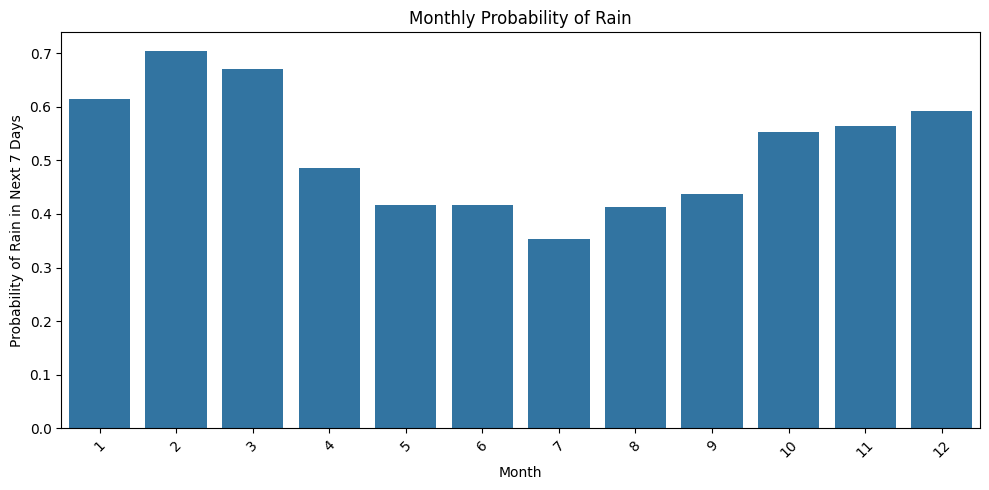

Monthly Probability of Rain in Next 7 Days:
    month  rain_in_7_days
0       1        0.615207
1       2        0.703797
2       3        0.670507
3       4        0.485714
4       5        0.417051
5       6        0.416667
6       7        0.352535
7       8        0.412442
8       9        0.438095
9      10        0.552995
10     11        0.564286
11     12        0.592166


In [28]:
# Compute monthly probability
df_train['month'] = df_train['date'].dt.month
monthly_rain = df_train.groupby('month')['rain_in_7_days'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=monthly_rain, x='month', y='rain_in_7_days')

plt.xlabel('Month')
plt.ylabel('Probability of Rain in Next 7 Days')
plt.title('Monthly Probability of Rain')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Monthly Probability of Rain in Next 7 Days:")
print(monthly_rain)

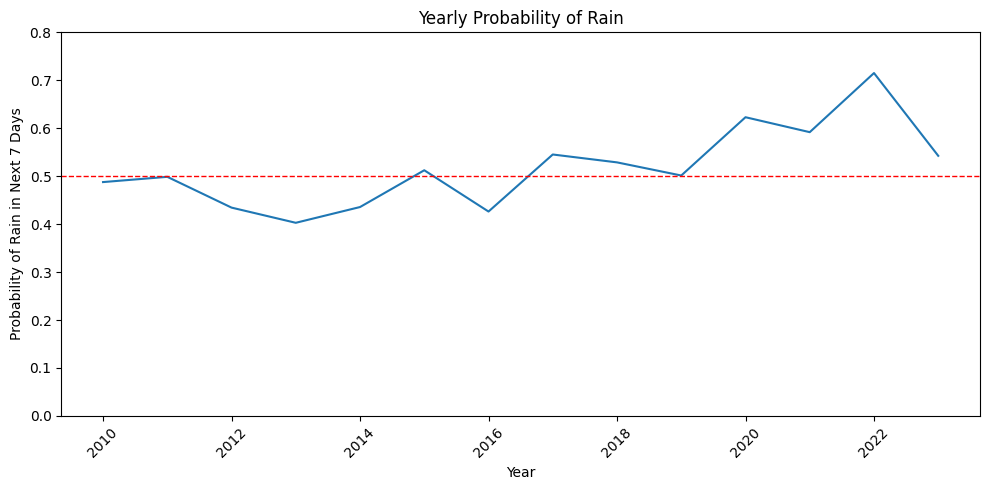

Yearly Probability of Rain in Next 7 Days:
    year  rain_in_7_days
0   2010        0.487671
1   2011        0.498630
2   2012        0.434426
3   2013        0.402740
4   2014        0.435616
5   2015        0.512329
6   2016        0.426230
7   2017        0.545205
8   2018        0.528767
9   2019        0.501370
10  2020        0.622951
11  2021        0.591781
12  2022        0.715068
13  2023        0.542466


In [29]:
# Ensure date is datetime
df_train['date'] = pd.to_datetime(df_train['date'])

# Extract year
df_train['year'] = df_train['date'].dt.year

# Compute yearly probability
yearly_rain = df_train.groupby('year')['rain_in_7_days'].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_rain, x='year', y='rain_in_7_days')

plt.xlabel('Year')
plt.ylabel('Probability of Rain in Next 7 Days')
plt.ylim((0,0.8))
plt.title('Yearly Probability of Rain')
plt.xticks(rotation=45)
plt.axhline(0.5, color='red', linestyle='--', linewidth=1)


plt.tight_layout()
plt.show()

# Print the exact values
print("Yearly Probability of Rain in Next 7 Days:")
print(yearly_rain)


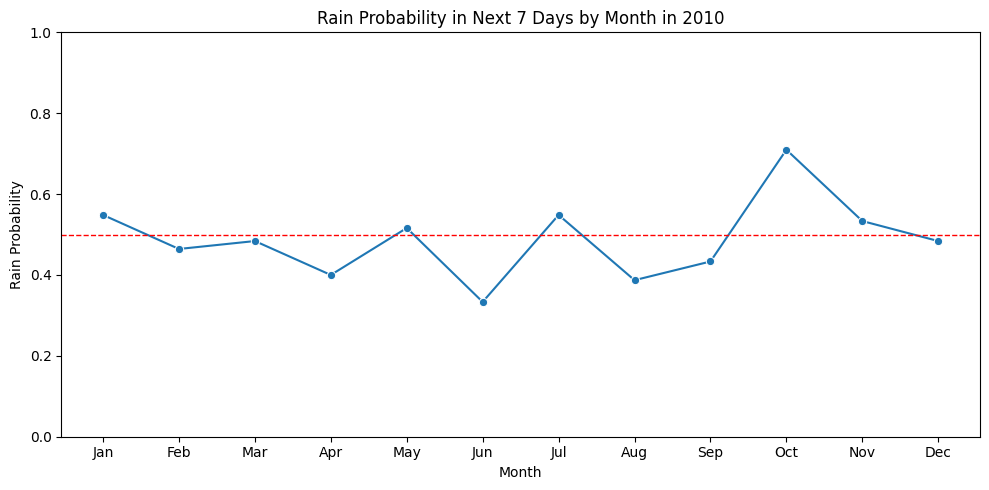

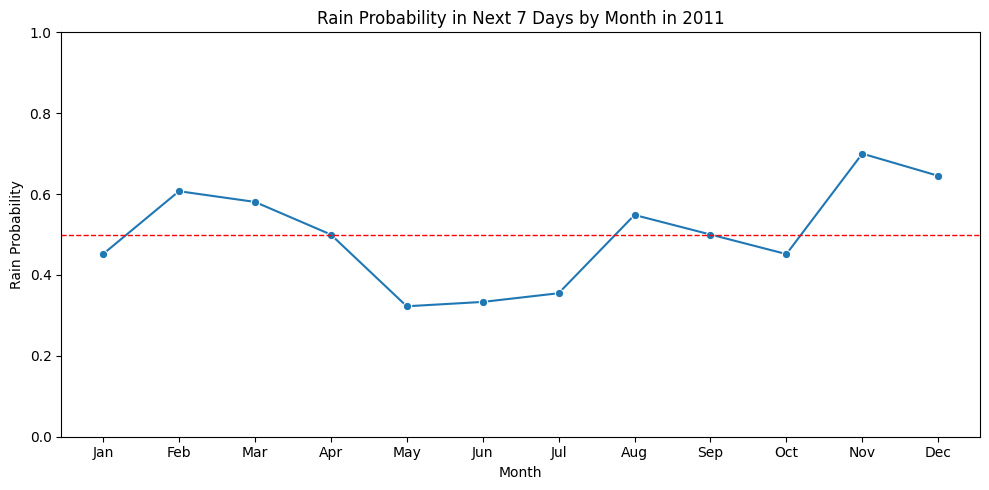

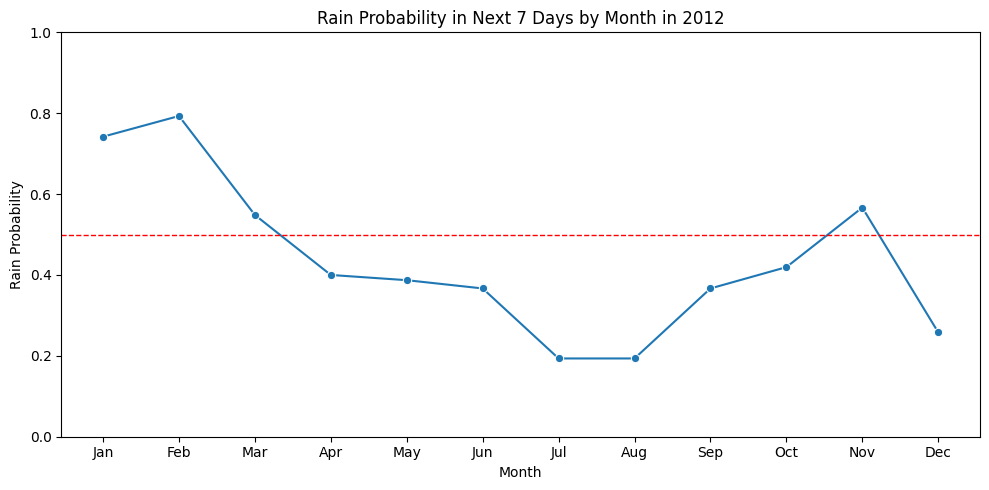

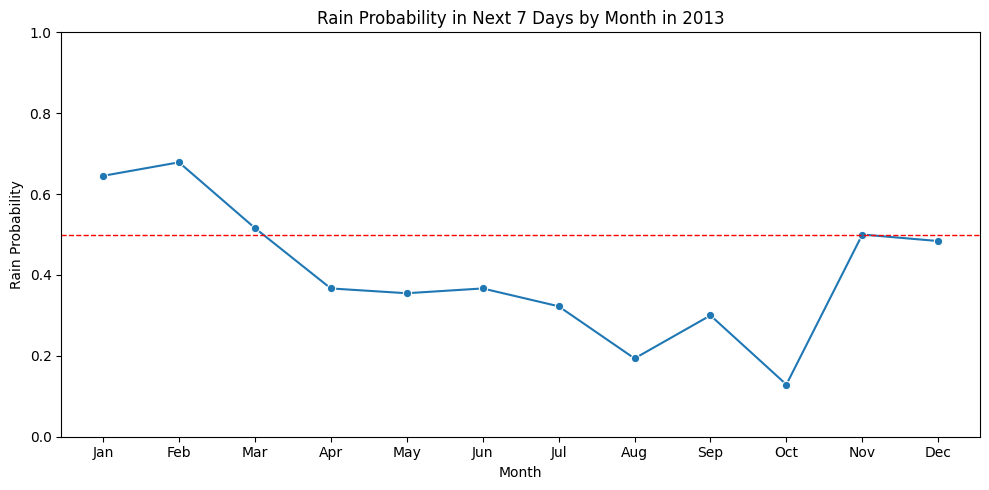

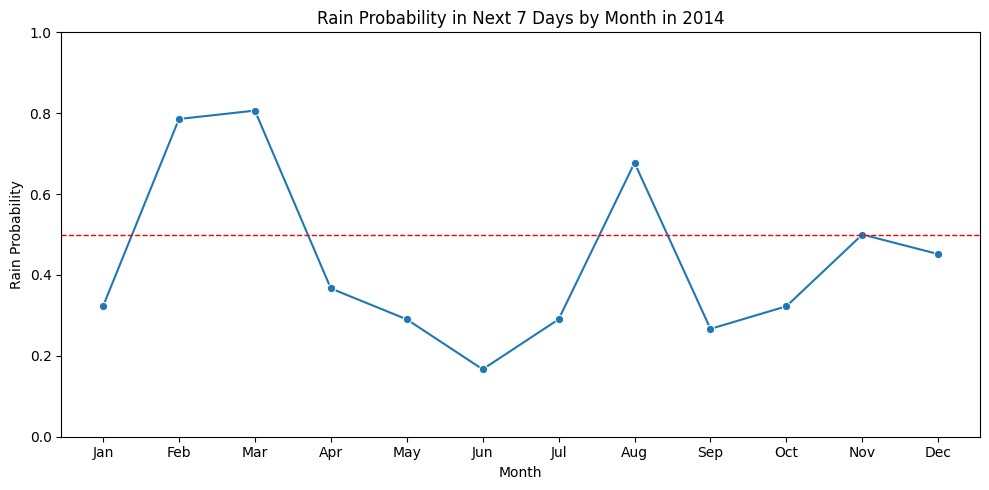

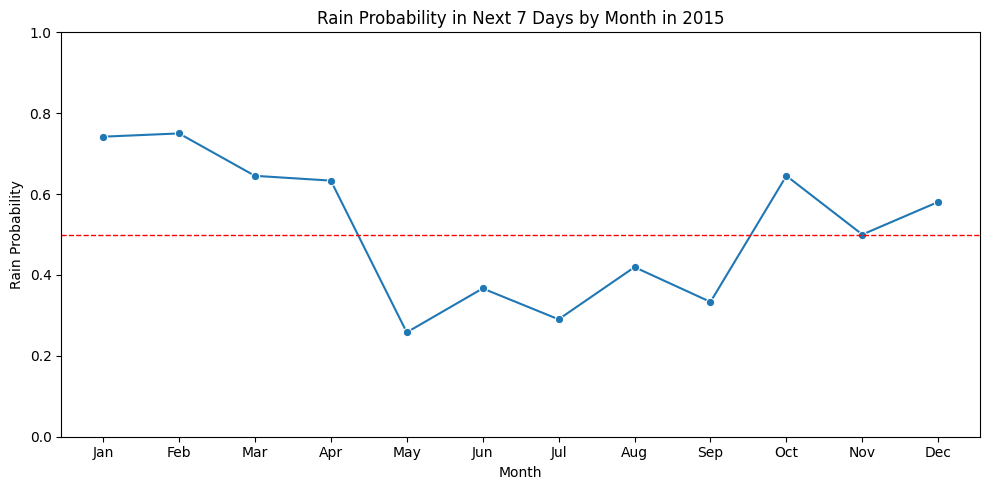

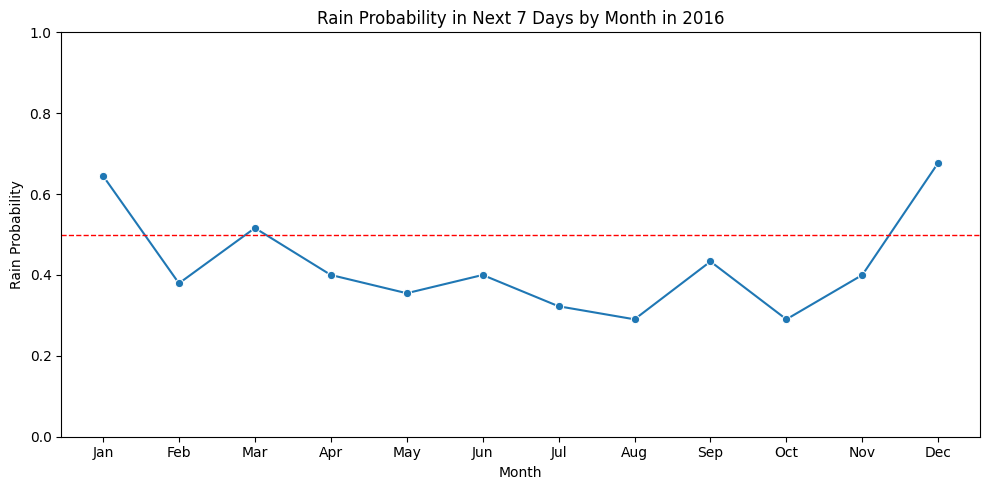

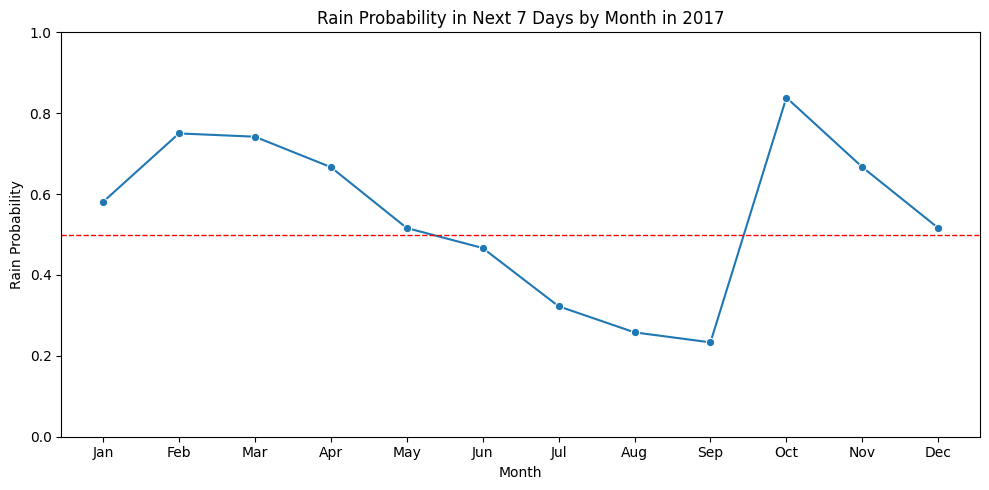

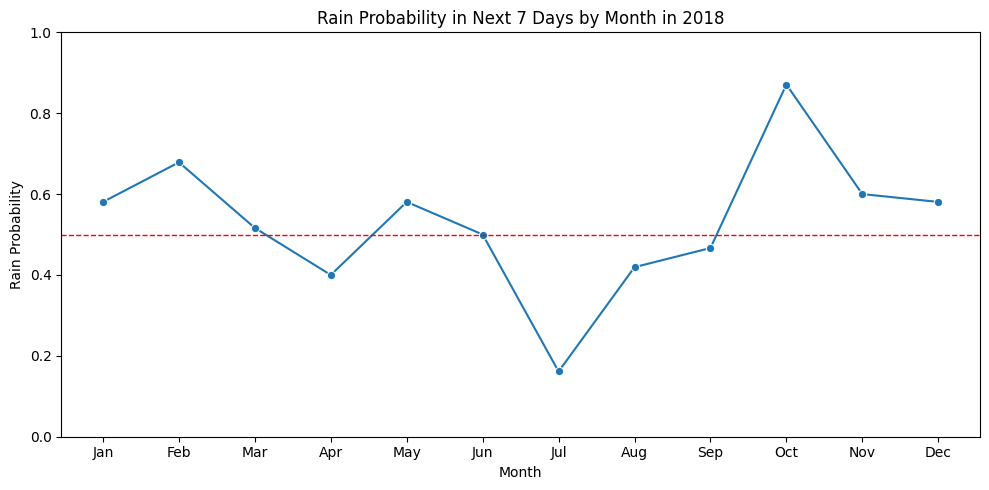

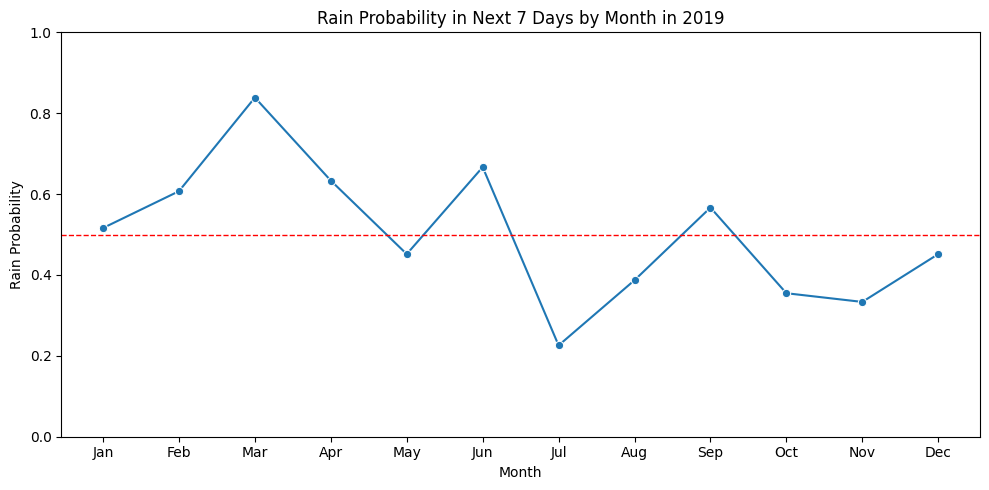

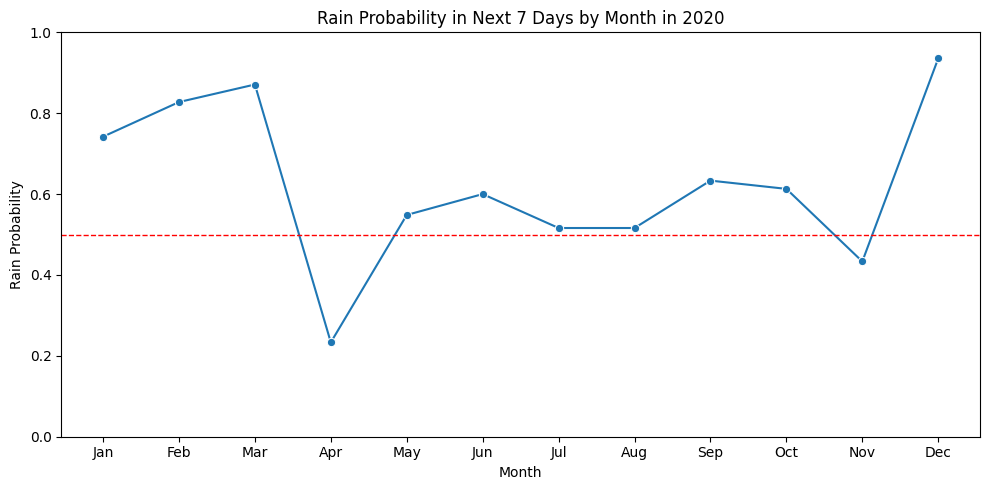

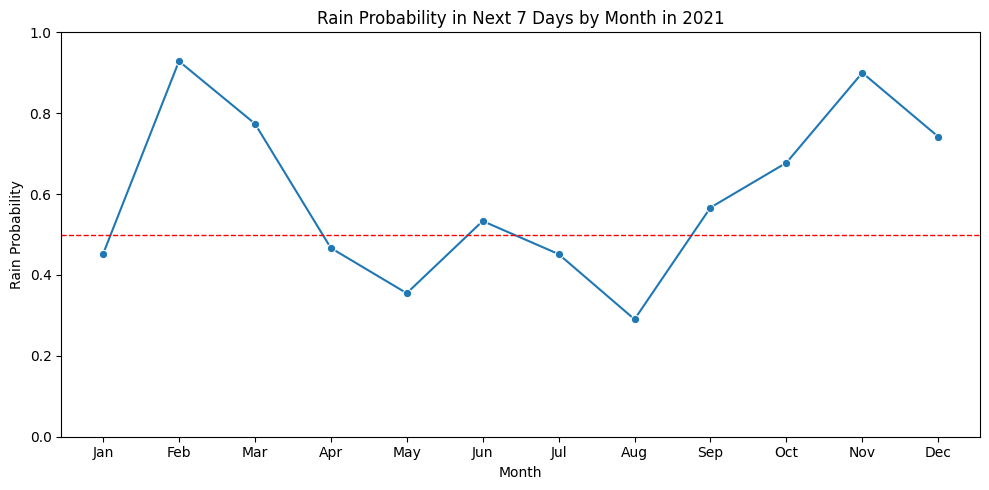

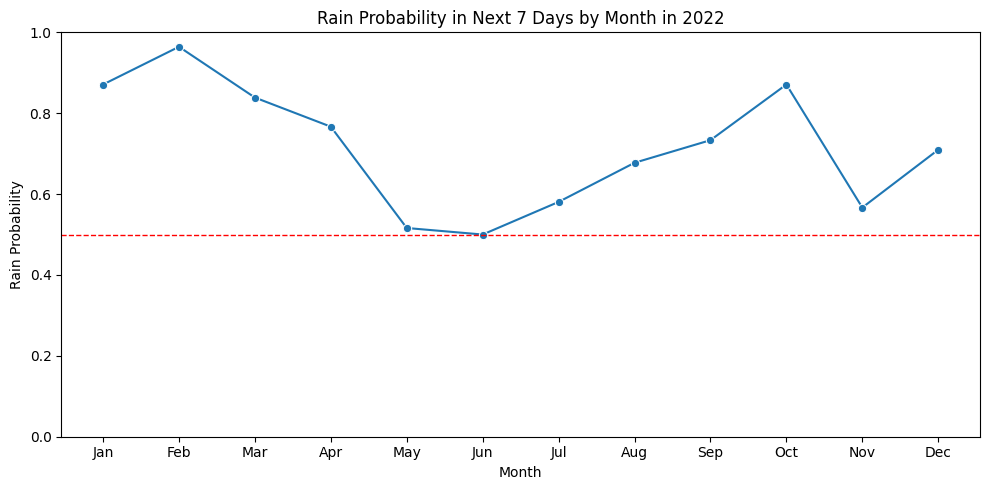

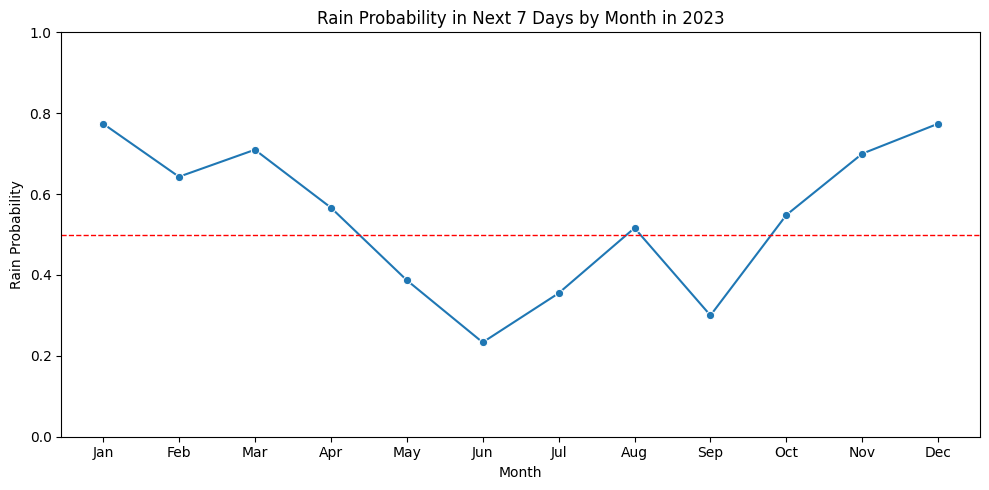

In [30]:
# Change to datetime
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['month'] = df_train['date'].dt.month
df_train['year'] = df_train['date'].dt.year

# Extract sorted unique years
years = sorted(df_train['year'].unique())

for year in years:
    df_year = df_train[df_train['year'] == year]
    
    # Compute mean rain probability per month
    monthly_prob = df_year.groupby('month')['rain_in_7_days'].mean().reset_index()
    
    plt.figure(figsize=(10,5))
    sns.lineplot(data=monthly_prob, x='month', y='rain_in_7_days', marker='o')
    
    plt.title(f"Rain Probability in Next 7 Days by Month in {year}")
    plt.xlabel("Month")
    plt.ylabel("Rain Probability")
    plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.axhline(0.5, color='red', linestyle='--', linewidth=1)

    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()


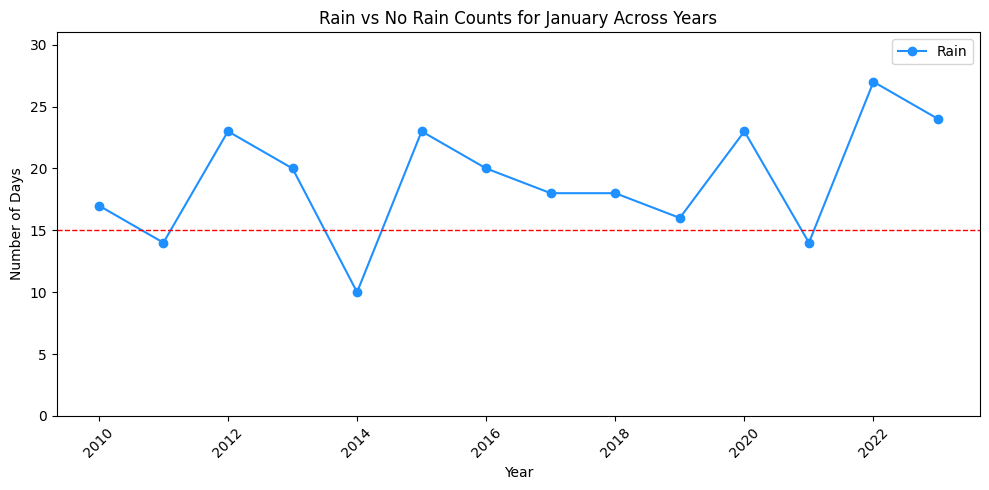

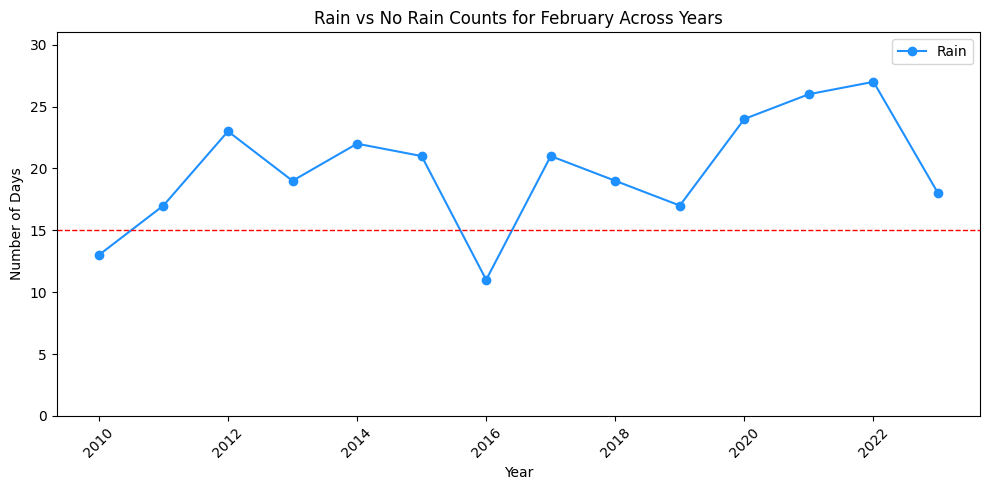

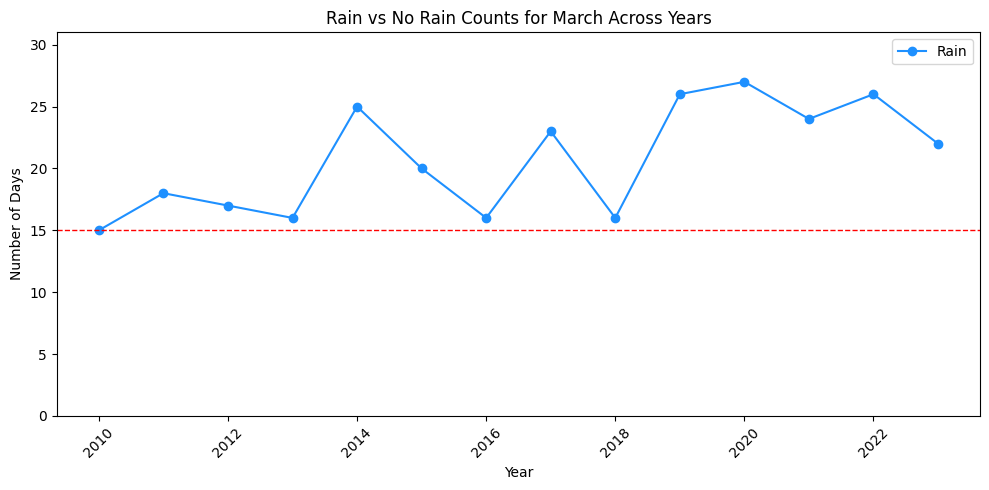

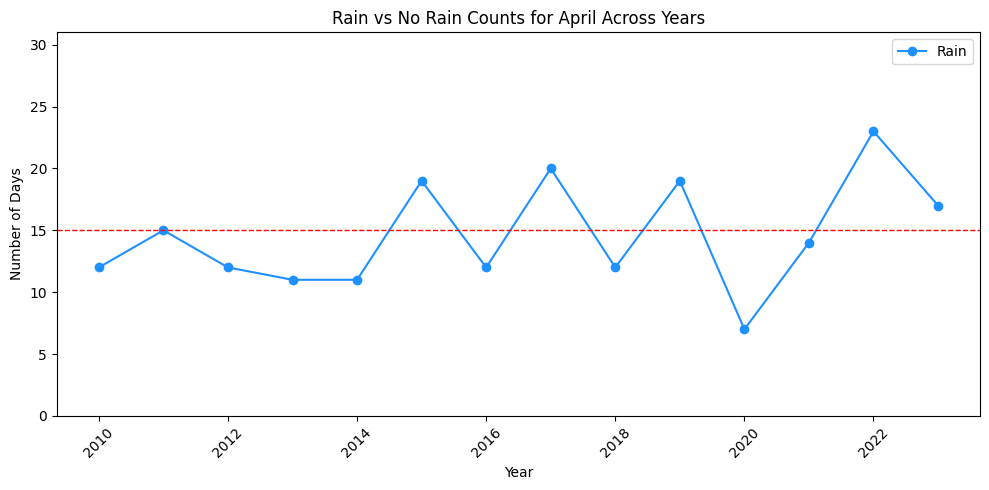

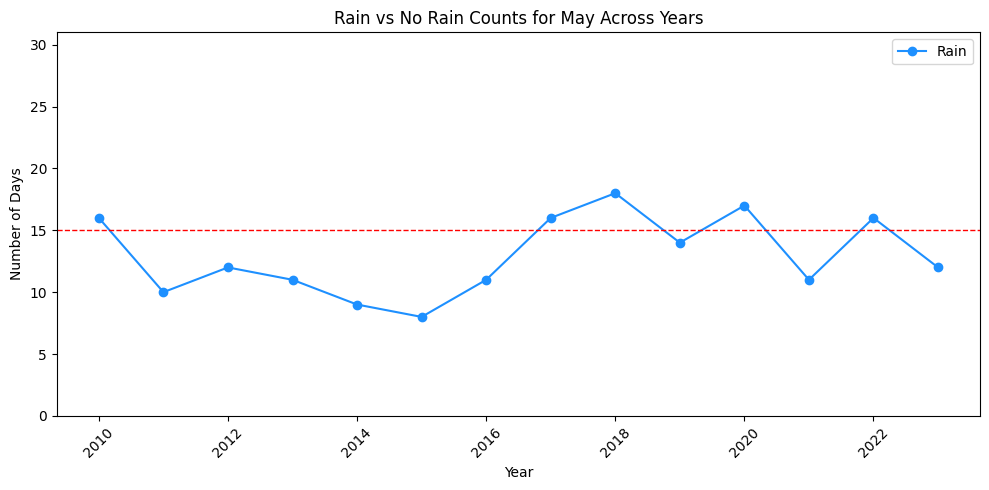

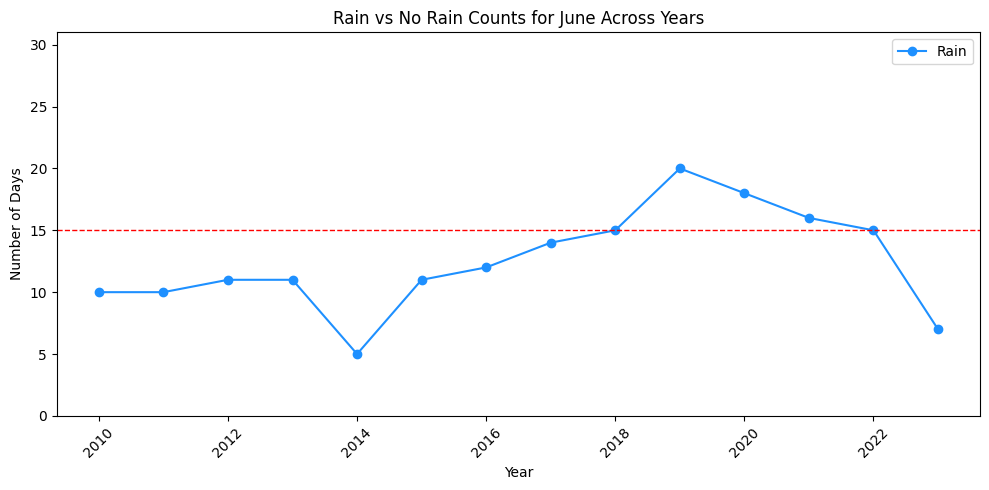

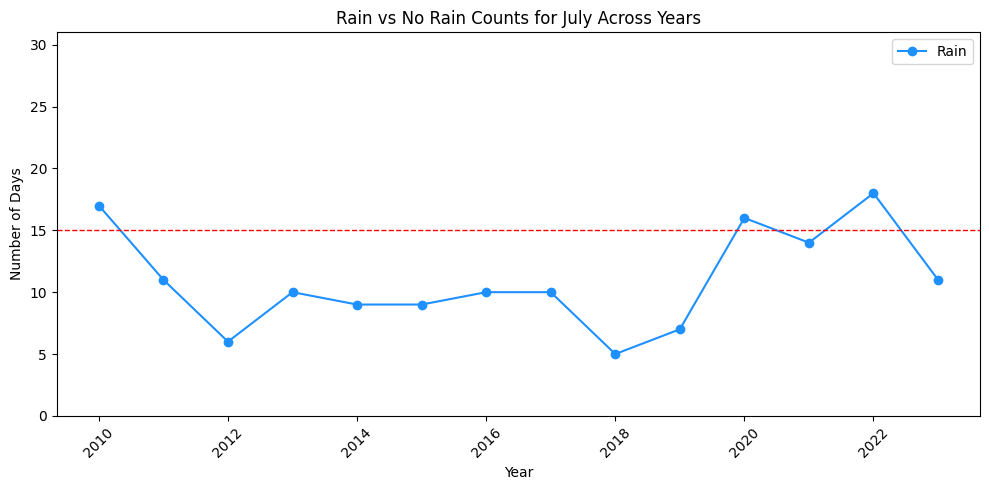

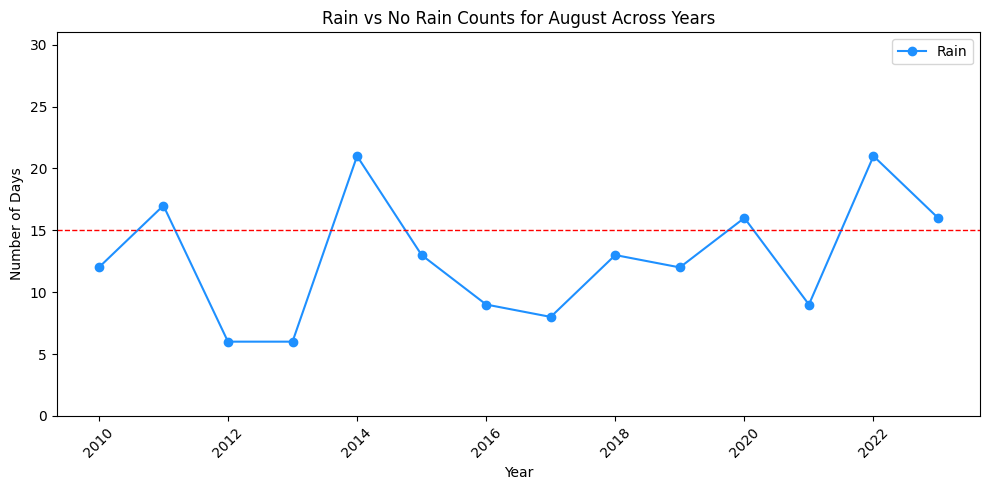

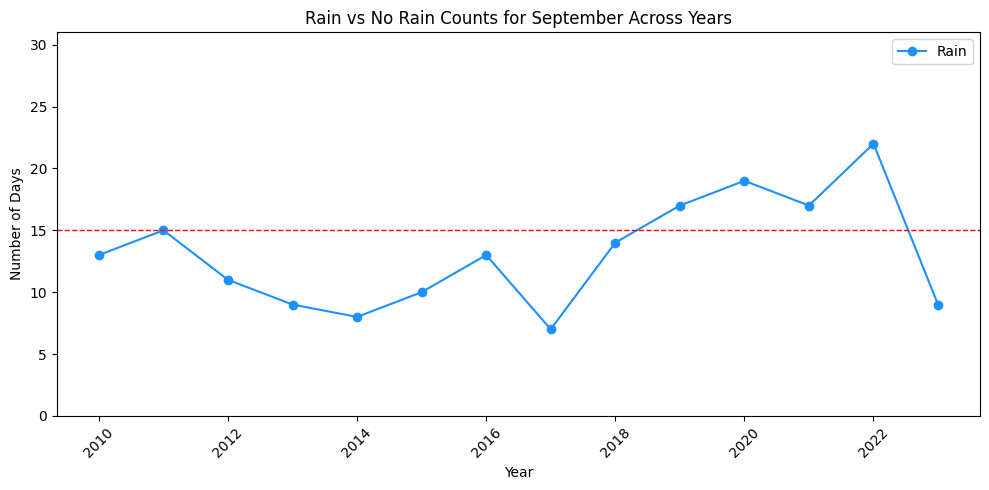

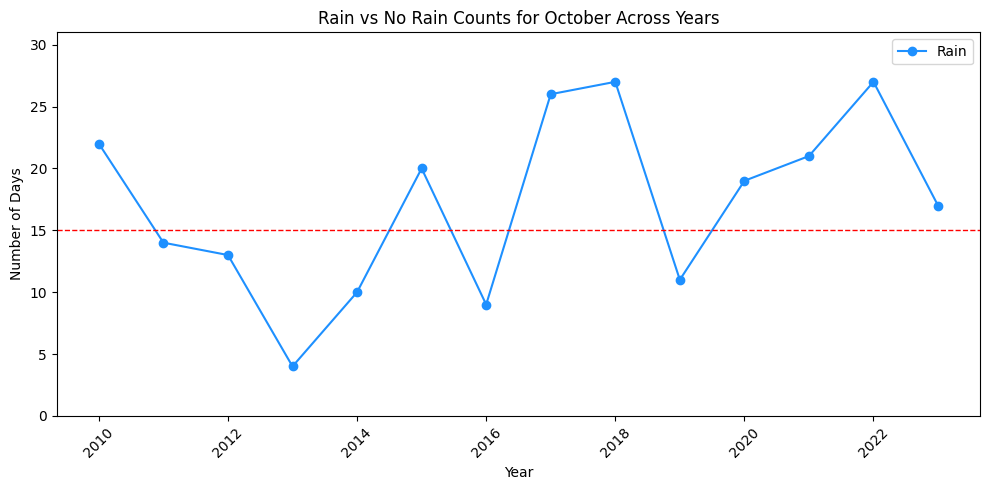

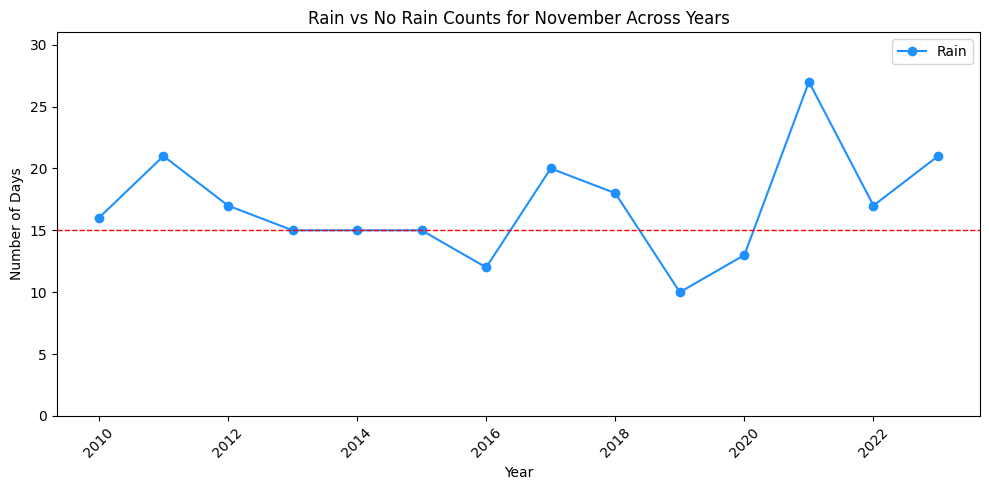

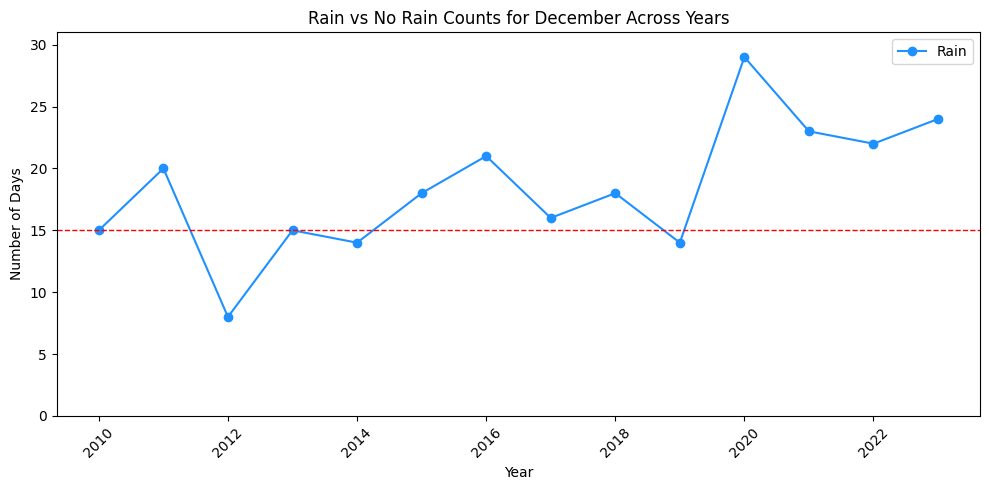

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import calendar

# Loop through months
for month_num in range(1, 13):
    df_month = df_train[df_train['month'] == month_num]
    
    # Count of rain/no rain per year
    yearly_counts = df_month.groupby(['year', 'rain_in_7_days']).size().reset_index(name='count')
    
    # Pivot so rain/no rain are columns
    pivot_counts = yearly_counts.pivot(index='year', columns='rain_in_7_days', values='count').fillna(0)
    
    plt.figure(figsize=(10,5))
    # Rain = blue
    plt.plot(pivot_counts.index, pivot_counts.get(1, 0), marker='o', color='dodgerblue', label='Rain')
    
    plt.axhline(15, color='red', linestyle='--', linewidth=1)

    plt.title(f'Rain vs No Rain Counts for {calendar.month_name[month_num]} Across Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Days')
    plt.ylim(0, 31)
    plt.xticks(rotation=45)
    plt.legend()    
    plt.tight_layout()
    plt.show()


In [32]:
# <Student to fill this section>
target_distribution_explanations = """
provide a detailed analysis on the target variable, its distribution, limitations, issues, ...
"""

In [33]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### Below goes through some feature engineering and explores features of interest

### C.5 Explore Feature of Interest `weather_code`

In [34]:
df_clean = df_train.copy()

In [35]:
# Look at the unique counts for weather code
df_clean.weather_code.value_counts(ascending=False)

weather_code
3.0     1513
51.0    1257
53.0     510
61.0     374
2.0      356
1.0      315
63.0     291
0.0      283
55.0     174
65.0      40
Name: count, dtype: int64

In [36]:
# Mapping dictionary from code to description
weather_map = {
    0: "Sunny",
    1: "Mainly Sunny",
    2: "Partly Cloudy",
    3: "Cloudy",
    51: "Light Drizzle",
    53: "Drizzle",
    55: "Heavy Drizzle",
    61: "Light Rain",
    63: "Rain",
    65: "Heavy Rain"
}

# Add a new column with descriptions and drop original weather code
df_clean["weather_desc"] = df_clean["weather_code"].map(weather_map)
df_clean = df_clean.drop("weather_code", axis=1)

weather_desc
Rain             0.659794
Heavy Rain       0.650000
Drizzle          0.552941
Heavy Drizzle    0.534483
Light Rain       0.529412
Light Drizzle    0.528242
Mainly Sunny     0.492063
Cloudy           0.486451
Partly Cloudy    0.483146
Sunny            0.452297
Name: rain_in_7_days, dtype: float64


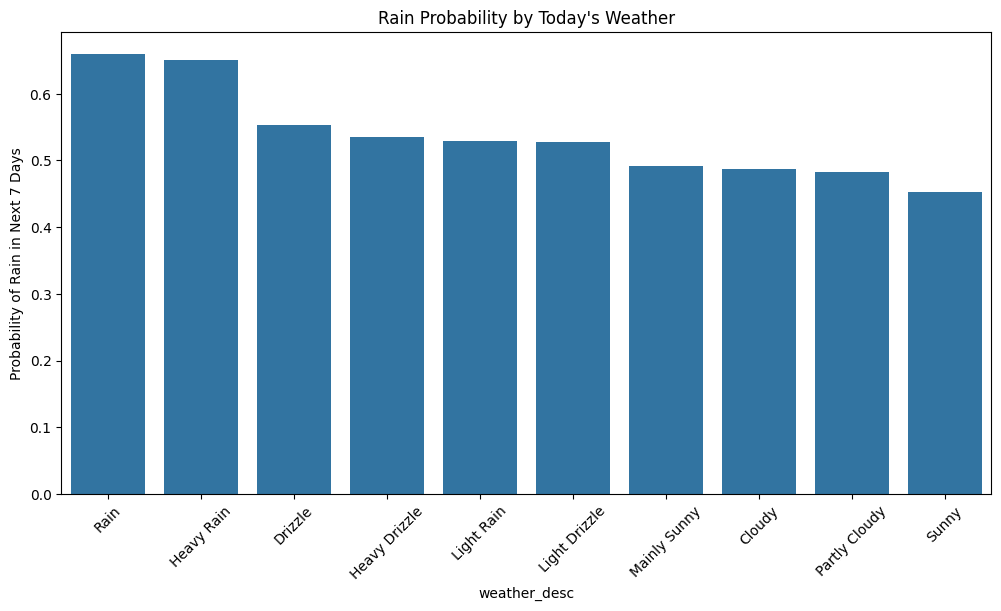

In [37]:
rain_prob_by_weather = df_clean.groupby('weather_desc')['rain_in_7_days'].mean().sort_values(ascending=False)
print(rain_prob_by_weather)

plt.figure(figsize=(12,6))
sns.barplot(x=rain_prob_by_weather.index, y=rain_prob_by_weather.values)
plt.xticks(rotation=45)
plt.ylabel("Probability of Rain in Next 7 Days")
plt.title("Rain Probability by Today's Weather")
plt.show()

In [38]:
# <Student to fill this section>
feature_1_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [39]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `precip_sum_lag1 and precip_sum_lag2`

In [40]:
# Create lag features
df_clean['precip_sum_lag1'] = df_clean['precipitation_sum'].shift(1)
df_clean['precip_sum_lag2'] = df_clean['precipitation_sum'].shift(2)

# Drop the first two rows with NaN in lag features
df_clean = df_clean.dropna(subset=['precip_sum_lag1', 'precip_sum_lag2']).reset_index(drop=True)

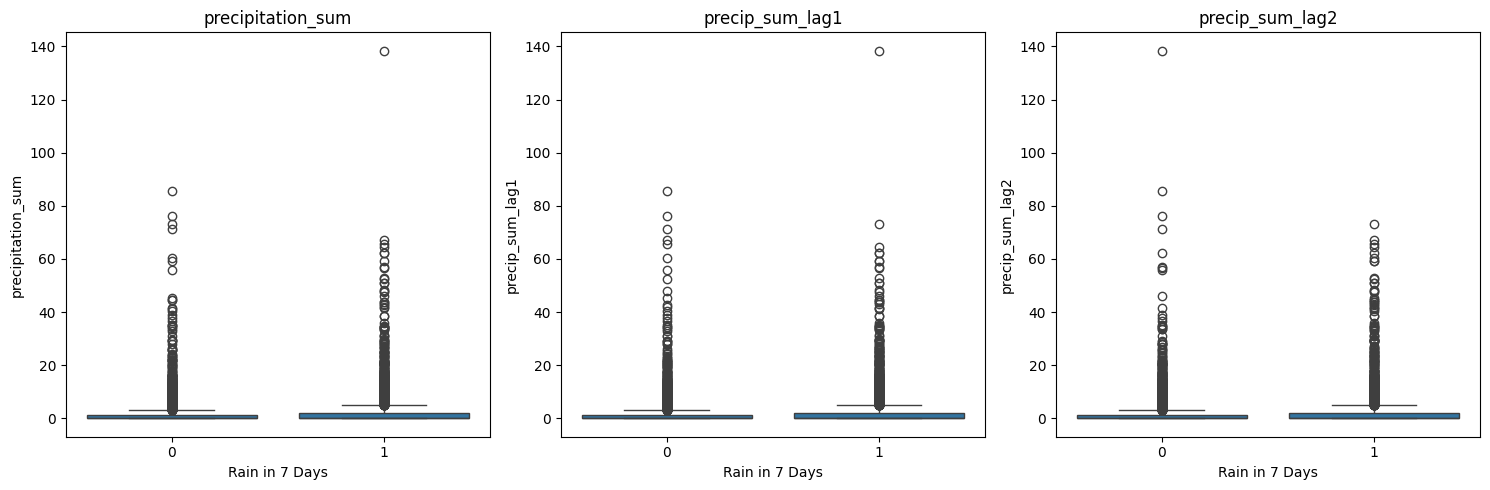

In [41]:
plt.figure(figsize=(15,5))

for i, col in enumerate(['precipitation_sum', 'precip_sum_lag1', 'precip_sum_lag2']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='rain_in_7_days', y=col, data=df_clean)
    plt.xlabel('Rain in 7 Days')
    plt.title(col)

plt.tight_layout()
plt.show()

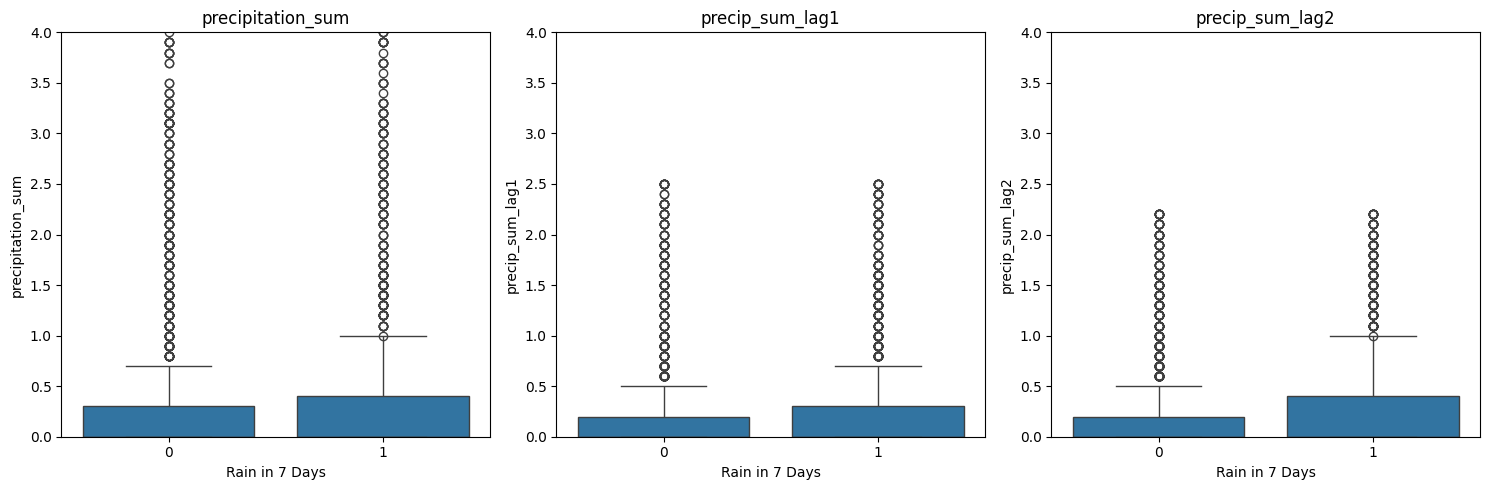

In [42]:
cols = ['precipitation_sum', 'precip_sum_lag1', 'precip_sum_lag2']
df_filtered = df_clean.copy()

# Remove outliers using IQR
for col in cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

# Determine global min/max for all three columns
y_min = df_filtered[cols].min().min()
y_max = df_filtered[cols].max().max()

# Plot
plt.figure(figsize=(15,5))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='rain_in_7_days', y=col, data=df_filtered)
    plt.xlabel('Rain in 7 Days')
    plt.title(col)
    plt.ylim(y_min, y_max)  # same scale for all plots

plt.tight_layout()
plt.show()


In [43]:
# <Student to fill this section>
feature_2_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [44]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `date`


In [45]:
# Basic time features
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day_of_week'] = df_clean['date'].dt.dayofweek
df_clean['quarter'] = df_clean['date'].dt.quarter

# Add cyclical features

# Encode month as sine/cosine
df_clean['month_sin'] = np.sin(2 * np.pi * df_clean['month']/12)
df_clean['month_cos'] = np.cos(2 * np.pi * df_clean['month']/12)

# Encode day of week as sine/cosine
df_clean['dow_sin'] = np.sin(2 * np.pi * df_clean['day_of_week']/7)
df_clean['dow_cos'] = np.cos(2 * np.pi * df_clean['day_of_week']/7)

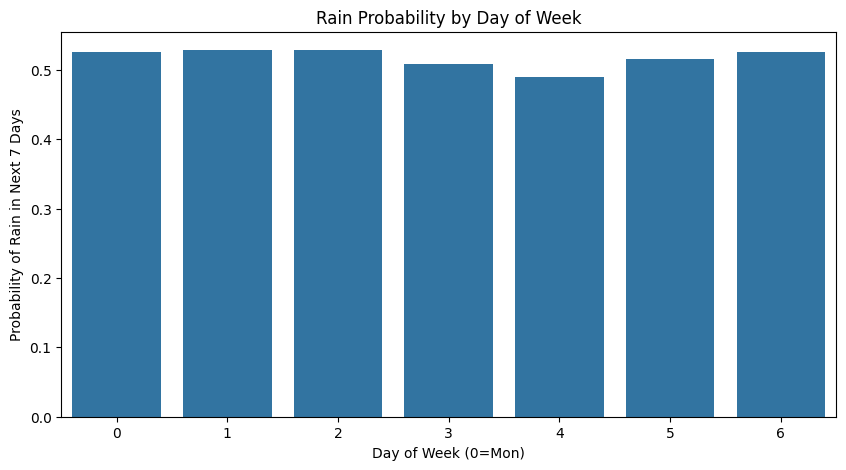

   day_of_week  rain_in_7_days
0            0        0.526027
1            1        0.528767
2            2        0.528767
3            3        0.508219
4            4        0.490411
5            5        0.516438
6            6        0.525308


In [46]:
# Day of week rain probability
dow_prob = df_clean.groupby('day_of_week')['rain_in_7_days'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=dow_prob, x='day_of_week', y='rain_in_7_days')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Probability of Rain in Next 7 Days')
plt.title('Rain Probability by Day of Week')
plt.show()

print(dow_prob)

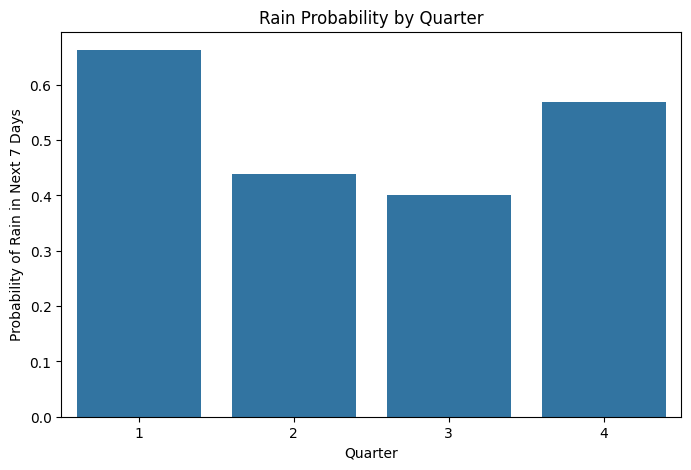

Rain probability by quarter:
   quarter  rain_in_7_days
0        1        0.662966
1        2        0.439560
2        3        0.400621
3        4        0.569876


In [47]:
# Compute probability of rain for each quarter
quarter_prob = df_clean.groupby('quarter')['rain_in_7_days'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=quarter_prob, x='quarter', y='rain_in_7_days')

plt.xlabel('Quarter')
plt.ylabel('Probability of Rain in Next 7 Days')
plt.title('Rain Probability by Quarter')
plt.show()

print("Rain probability by quarter:")
print(quarter_prob)


In [48]:
# Drop raw month, day_of_week (redundant with sine/cosine) after having an exploration.
df_clean = df_clean.drop(columns=['month', 'day_of_week'])

In [49]:
# <Student to fill this section>
feature_3_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [50]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

### C.7 Explore Feature of Interest `sunrise and sunset`


In [51]:
print(df_clean['sunrise'].value_counts())
print(df_clean['sunset'].value_counts())

sunrise
1262544609    1
1556742612    1
1557347731    1
1557261285    1
1557174840    1
             ..
1409688679    1
1409602356    1
1409516033    1
1409429710    1
1704048445    1
Name: count, Length: 5111, dtype: int64
sunset
1262596189    1
1556781265    1
1557385679    1
1557299331    1
1557212984    1
             ..
1409729891    1
1409643451    1
1409557010    1
1409470569    1
1704100148    1
Name: count, Length: 5111, dtype: int64


Can see that sunrise and sunset is in a unix timestamp

In [52]:
# Convert Unix timestamp to datetime
df_clean['sunrise_dt'] = pd.to_datetime(df_clean['sunrise'], unit='s')
df_clean['sunset_dt'] = pd.to_datetime(df_clean['sunset'], unit='s')

# Extract hour + minute as decimal
df_clean['sunrise_hour'] = df_clean['sunrise_dt'].dt.hour + df_clean['sunrise_dt'].dt.minute/60
df_clean['sunset_hour'] = df_clean['sunset_dt'].dt.hour + df_clean['sunset_dt'].dt.minute / 60

In [53]:
print(df_clean['sunrise_hour'])
print(df_clean['sunset_hour'])

0       18.833333
1       18.833333
2       18.850000
3       18.866667
4       18.883333
          ...    
5106    18.733333
5107    18.750000
5108    18.750000
5109    18.766667
5110    18.783333
Name: sunrise_hour, Length: 5111, dtype: float64
0       9.150000
1       9.150000
2       9.150000
3       9.150000
4       9.150000
          ...   
5106    9.133333
5107    9.133333
5108    9.133333
5109    9.133333
5110    9.150000
Name: sunset_hour, Length: 5111, dtype: float64


In [54]:
df_clean.drop(columns=['sunrise','sunrise_dt','sunset','sunset_dt'], inplace=True)

In [55]:
# <Student to fill this section>
feature_4_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [56]:
# Do not modify this code
print_tile(size="h3", key='feature_4_insights', value=feature_4_insights)

---
## D. Feature Selection


In [61]:
# Copy df_clean to df_train
df_train = df_clean.copy()

### D.1 Approach "Correlation and VIF"


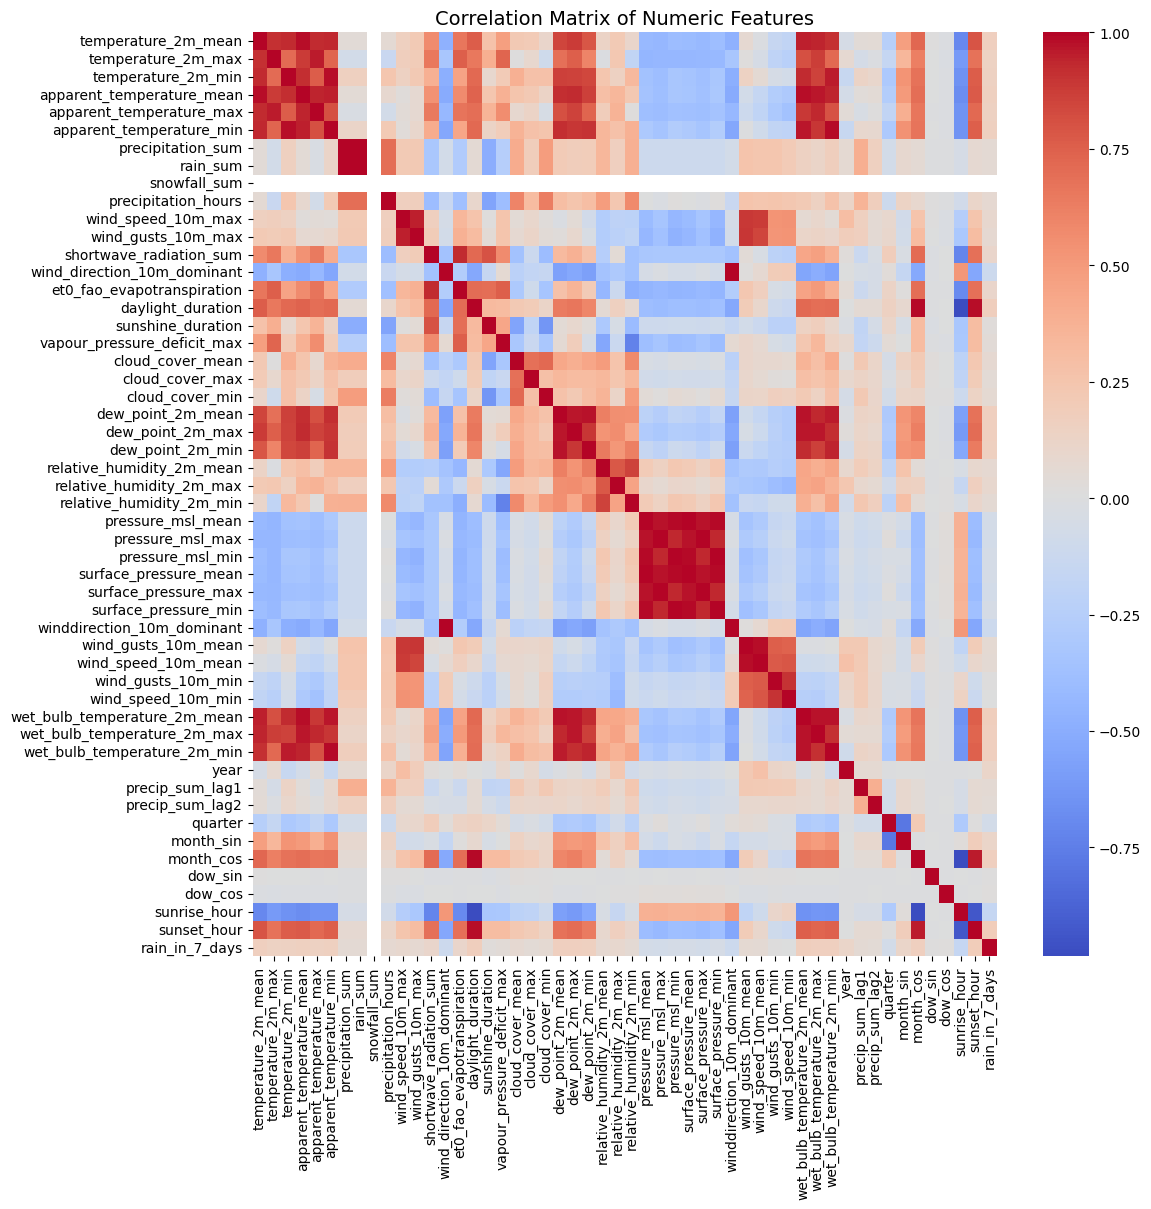

In [62]:
from my_krml_25552249.features.selection import plot_corr_matrix
plot_corr_matrix(df_train, target="rain_in_7_days", annot=False)

Remove snowfall_sum as the values are all 0

In [63]:
df_train.drop('snowfall_sum', axis=1, inplace=True)

In [64]:
# Select numerical columns
numerical_cols = df_train.select_dtypes(include=[np.number]).columns

# Exclude the two target columns
feature_cols = [col for col in numerical_cols if col not in [target]]

X = df_train.copy()
X = X[feature_cols]

In [65]:
from my_krml_25552249.features.selection import correlation_filter
# Correlation filtering
X_corr, dropped_corr = correlation_filter(X, threshold=0.90)
print("Dropped by correlation:", dropped_corr)

[INFO] Correlation filter applied. Dropped 25 features (>|0.9|).
Dropped by correlation: ['temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'rain_sum', 'wind_gusts_10m_max', 'et0_fao_evapotranspiration', 'dew_point_2m_mean', 'dew_point_2m_max', 'dew_point_2m_min', 'pressure_msl_max', 'pressure_msl_min', 'surface_pressure_mean', 'surface_pressure_max', 'surface_pressure_min', 'winddirection_10m_dominant', 'wind_speed_10m_mean', 'wind_speed_10m_min', 'wet_bulb_temperature_2m_mean', 'wet_bulb_temperature_2m_max', 'wet_bulb_temperature_2m_min', 'month_cos', 'sunrise_hour', 'sunset_hour']


In [66]:
X_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperature_2m_mean          5111 non-null   float64
 1   precipitation_sum            5111 non-null   float64
 2   precipitation_hours          5111 non-null   float64
 3   wind_speed_10m_max           5111 non-null   float64
 4   shortwave_radiation_sum      5111 non-null   float64
 5   wind_direction_10m_dominant  5111 non-null   float64
 6   daylight_duration            5111 non-null   float64
 7   sunshine_duration            5111 non-null   float64
 8   vapour_pressure_deficit_max  5111 non-null   float64
 9   cloud_cover_mean             5111 non-null   float64
 10  cloud_cover_max              5111 non-null   float64
 11  cloud_cover_min              5111 non-null   float64
 12  relative_humidity_2m_mean    5111 non-null   float64
 13  relative_humidity_

In [67]:
features = X_corr.columns.tolist() + ['weather_desc'] + [target]

df_fs = df_train.copy()
df_fs = df_fs[features]

In [ ]:
# <Student to fill this section>
feature_selection_1_insights = """
provide an explanation on why you use this approach for feature selection and describe its results
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "Correlation, Mutual info and Cramer's V"


In [68]:
from scipy.stats import pointbiserialr

# Select numeric features (excluding target)
numeric_features = df_fs.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [f for f in numeric_features if f != target]

# Compute point-biserial correlation with target
pb_corr = {}
for col in numeric_features:
    corr, pval = pointbiserialr(df_fs[col], df_fs[target])
    pb_corr[col] = corr

# Sort correlations
pb_corr = dict(sorted(pb_corr.items(), key=lambda x: abs(x[1]), reverse=True))

# Convert to DataFrame
pb_corr_df = pd.DataFrame(list(pb_corr.items()), columns=['Feature', 'Point-Biserial Correlation'])
pb_corr_df

,Feature,Point-Biserial Correlation
0,daylight_duration,0.176138
1,temperature_2m_mean,0.163076
2,wind_direction_10m_dominant,-0.115082
3,month_sin,0.113155
4,shortwave_radiation_sum,0.105532
5,relative_humidity_2m_max,0.089090
6,wind_speed_10m_max,0.086201
7,precipitation_hours,0.075963
8,relative_humidity_2m_mean,0.072795
9,cloud_cover_mean,0.072118


In [72]:
from sklearn.feature_selection import mutual_info_classif

X_num = df_clean[numeric_features]
y = df_clean[target]

mi_scores = mutual_info_classif(X_num, y, discrete_features=False, random_state=33)
pd.Series(mi_scores, index=X_num.columns).sort_values(ascending=False)

daylight_duration              0.030891
temperature_2m_mean            0.014201
sunshine_duration              0.013980
wind_direction_10m_dominant    0.013401
dow_sin                        0.012820
precip_sum_lag1                0.009863
shortwave_radiation_sum        0.008664
cloud_cover_max                0.008529
relative_humidity_2m_max       0.007207
precip_sum_lag2                0.006399
wind_speed_10m_max             0.005797
cloud_cover_mean               0.005380
month_sin                      0.003055
vapour_pressure_deficit_max    0.002634
wind_gusts_10m_min             0.002407
cloud_cover_min                0.000591
wind_gusts_10m_mean            0.000000
pressure_msl_mean              0.000000
relative_humidity_2m_min       0.000000
relative_humidity_2m_mean      0.000000
precipitation_sum              0.000000
precipitation_hours            0.000000
dow_cos                        0.000000
dtype: float64

In [101]:
# Define function for cramer's v
def cramers_v(x, y):
    from scipy.stats import chi2_contingency
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print(cramers_v(df_clean['weather_desc'], df_clean['rain_in_7_days']))

0.08258294739151816


In [ ]:
# <Student to fill this section>
feature_selection_2_insights = """
provide an explanation on why you use this approach for feature selection and describe its results
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "Random Forest Importance and RFE"

> You can add more cells related to other approaches in this section

In [75]:
X = df_fs.drop(columns=target).copy()
y = df_fs[target].copy()

categorical_cols = ['weather_desc']  
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

from my_krml_25552249.features.selection import get_feature_importance
feat_imp_rf = get_feature_importance(X_encoded, y, model_type="rf_classifier")
feat_imp_rf

daylight_duration              0.063216
temperature_2m_mean            0.058590
wind_direction_10m_dominant    0.052782
wind_speed_10m_max             0.051949
pressure_msl_mean              0.051829
relative_humidity_2m_max       0.050740
shortwave_radiation_sum        0.050393
wind_gusts_10m_mean            0.049764
relative_humidity_2m_mean      0.048280
relative_humidity_2m_min       0.048235
vapour_pressure_deficit_max    0.047360
sunshine_duration              0.046596
cloud_cover_mean               0.046038
year                           0.044584
wind_gusts_10m_min             0.043199
precip_sum_lag2                0.028834
precip_sum_lag1                0.028622
cloud_cover_min                0.024625
dow_sin                        0.024543
precipitation_sum              0.024505
cloud_cover_max                0.023023
precipitation_hours            0.019337
month_sin                      0.019214
dow_cos                        0.015664
quarter                        0.014212


In [77]:
from my_krml_25552249.features.selection import run_rfe
selected_rf_cls, rfe_rf_cls = run_rfe(X_encoded, y, model_type="rf_classifier", n_features_to_select=8)
selected_rf_cls

[INFO] Model: rf_classifier | Selected 8 features
Selected features: ['temperature_2m_mean', 'wind_speed_10m_max', 'wind_direction_10m_dominant', 'daylight_duration', 'cloud_cover_mean', 'relative_humidity_2m_max', 'relative_humidity_2m_min', 'pressure_msl_mean']


['temperature_2m_mean',
 'wind_speed_10m_max',
 'wind_direction_10m_dominant',
 'daylight_duration',
 'cloud_cover_mean',
 'relative_humidity_2m_max',
 'relative_humidity_2m_min',
 'pressure_msl_mean']

## D.z Final Selection of Features

In [104]:
# 
features_list = [
    "daylight_duration",
    "temperature_2m_mean",
    "wind_direction_10m_dominant",
    "wind_speed_10m_max",
    "relative_humidity_2m_max",
    "cloud_cover_mean",
    "pressure_msl_mean",
    "relative_humidity_2m_min",
    "shortwave_radiation_sum",
    "sunshine_duration"
]
target = 'rain_in_7_days'

In [106]:
# <Student to fill this section>
feature_selection_explanations = """
These features were chosen because they consistently ranked higher across RFE (model-driven selection), Random Forest importance (predictive power), and mutual information (non-linear dependence).
In contrast, features like precipitation lags and time components showed weak and inconsistent contribution across methods, so they were excluded."""

In [107]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

Apply all previously created and transformed features to the entire dataset df before splitting into df_train and df_test. This is necessary because some features, such as precip_sum_lag1 and precip_sum_lag2, depend on previous records. If the dataset were split first, the beginning of the test set would be missing these lag values.

In [196]:
# Load all the data again
df = pd.read_csv("../../data/raw/sydney_weather_2010_2024.csv")

# Remove the single 2009 record
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year != 2009]

## Create the target variable
# Binary target: rain in next 7 days
# Rain exactly in 7 days (binary)
df['rain_in_7_days'] = (df['precipitation_sum'].shift(-7) > 0).astype(int)

# Drop last 7 rows as they will not have a label.
df = df.iloc[:-7].reset_index(drop=True)

## Mapping weather_description
# Mapping dictionary from code to description
weather_map = {
    0: "Sunny",
    1: "Mainly Sunny",
    2: "Partly Cloudy",
    3: "Cloudy",
    51: "Light Drizzle",
    53: "Drizzle",
    55: "Heavy Drizzle",
    61: "Light Rain",
    63: "Rain",
    65: "Heavy Rain"
}

# Add a new column with descriptions and drop original weather code
df["weather_desc"] = df["weather_code"].map(weather_map)
df = df.drop("weather_code", axis=1)


## Creating lag features
# Create lag features
df['precip_sum_lag1'] = df['precipitation_sum'].shift(1)
df['precip_sum_lag2'] = df['precipitation_sum'].shift(2)

# Drop the first two rows with NaN in lag features
df = df.dropna(subset=['precip_sum_lag1', 'precip_sum_lag2']).reset_index(drop=True)


## Time features
# Basic time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter

# Add cyclical features

# Encode month as sine/cosine
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

# Encode day of week as sine/cosine
df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week']/7)
df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week']/7)

# Convert Unix timestamp to datetime
df['sunrise_dt'] = pd.to_datetime(df['sunrise'], unit='s')
df['sunset_dt'] = pd.to_datetime(df['sunset'], unit='s')

# Extract hour + minute as decimal
df['sunrise_hour'] = df['sunrise_dt'].dt.hour + df['sunrise_dt'].dt.minute/60
df['sunset_hour'] = df['sunset_dt'].dt.hour + df['sunset_dt'].dt.minute / 60

df.drop(columns=['snowfall_sum','sunrise', 'sunrise_dt', 'sunset', 'sunset_dt', 'day_of_week', 'month'], inplace=True)

### E.1 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

Here, we will save X_data, y_data, X_test and y_test with all potential variables for future experiments.

In [199]:
# Split into train and test
df_train = df[df["date"].dt.year != 2024]
df_test = df[df["date"].dt.year == 2024]

In [201]:
# Split features and target for train
X_data = df_train.drop(columns=[target], axis=1)
y_data = df_train[[target]] 

# Split features and target for test
X_test = df_test.drop(columns=[target], axis=1)
y_test = df_test[[target]]

In [ ]:
# <Student to fill this section>
data_splitting_explanations = """
Provide some explanations on what is the best strategy to use for data splitting for this dataset
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

---
## H. Save Datasets

> Do not change this code

In [ ]:
# # Do not modify this code
# # Save training set
# try:
#   X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
#   y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

#   X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
#   y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

#   X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
#   y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
# except Exception as e:
#   print(e)

In [203]:
# Do not modify this code
# Save training set
try:
  X_data.to_csv('../../data/processed/X_data_clf.csv', index=False)
  y_data.to_csv('../../data/processed/y_data_clf.csv', index=False)

  X_test.to_csv('../../data/processed/X_test_clf.csv', index=False)
  y_test.to_csv('../../data/processed/y_test_clf.csv', index=False)
except Exception as e:
  print(e)

In [204]:
# Load X_data with the selected features
X_data = df_train[features_list]
y_data = df_train[target]

X_test = df_test[features_list]
y_test = df_test[target]

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
performance_metrics_explanations = """
Provide some explanations on why you believe the performance metrics you chose is appropriate
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>

In [205]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from xgboost import XGBClassifier


tscv = TimeSeriesSplit(n_splits=5)

In [206]:
space = {
    'max_depth': hp.choice('max_depth', np.arange(2, 10, dtype=int)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'n_estimators': hp.choice('n_estimators', np.arange(50, 400, 25, dtype=int)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'gamma': hp.uniform('gamma', 0, 5),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 10, dtype=int)),
}


In [207]:
def objective(params):
    aucs = []
    f1s = []
    for train_idx, val_idx in tscv.split(X_data):
        X_train, X_val = X_data.iloc[train_idx], X_data.iloc[val_idx]
        y_train, y_val = y_data.iloc[train_idx], y_data.iloc[val_idx]
        
        model = XGBClassifier(
            **params,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=33,
            early_stopping_rounds=20
        )

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
        
        preds = model.predict(X_val)
        preds_proba = model.predict_proba(X_val)[:, 1]

        f1_fold = f1_score(y_val, preds)
        auc_fold = roc_auc_score(y_val, preds_proba)

        f1s.append(f1_fold)
        aucs.append(auc_fold)

    return {
        'loss': -np.mean(aucs),  # maximize ROC-AUC
        'status': STATUS_OK,
        'fold_aucs': aucs,
        'fold_f1s': f1s,
        'mean_auc': np.mean(aucs),
        'mean_f1': np.mean(f1s)
    }

# Run Hyperopt
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(33)
)

100%|████████| 50/50 [00:15<00:00,  3.18trial/s, best loss: -0.6070366116519526]


In [208]:
print("Best parameters:", best)

Best parameters: {'colsample_bytree': np.float64(0.8579636179777163), 'gamma': np.float64(0.0003510165108996238), 'learning_rate': np.float64(0.013004212024325734), 'max_depth': np.int64(0), 'min_child_weight': np.int64(1), 'n_estimators': np.int64(1), 'subsample': np.float64(0.7893665288577477)}


In [210]:
# Best trial index
best_trial_idx = np.argmin([t['result']['loss'] for t in trials.trials])
best_trial = trials.trials[best_trial_idx]['result']

print("Fold-wise ROC-AUC:", best_trial['fold_aucs'])
print("Mean ROC-AUC:", best_trial['mean_auc'])
print("Fold-wise F1:", best_trial['fold_f1s'])
print("Mean F1:", best_trial['mean_f1'])

Fold-wise ROC-AUC: [np.float64(0.5856578721455961), np.float64(0.6002427022333059), np.float64(0.6191908192327022), np.float64(0.585360836205938), np.float64(0.6447308284422207)]
Mean ROC-AUC: 0.6070366116519526
Fold-wise F1: [np.float64(0.5053763440860215), np.float64(0.4221879815100154), np.float64(0.5298507462686567), np.float64(0.5248407643312102), np.float64(0.6585612968591692)]
Mean F1: 0.5281634266110146


In [ ]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [209]:
# Best parameters
best_params = {
    'max_depth': [2,3,4,5,6,7,8,9][best['max_depth']],
    'learning_rate': best['learning_rate'],
    'n_estimators': [i for i in range(50,400,25)][best['n_estimators']],
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'gamma': best['gamma'],
    'min_child_weight': [i for i in range(1,10)][best['min_child_weight']],
}

final_model = XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=33
)

final_model.fit(X_data, y_data)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.8579636179777163), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=np.float64(0.0003510165108996238), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.013004212024325734), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, ...)

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [211]:
y_pred = final_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1:", f1_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_pred))

Test Accuracy: 0.611731843575419
Test F1: 0.6729411764705883
Test ROC-AUC: 0.6009016745384285


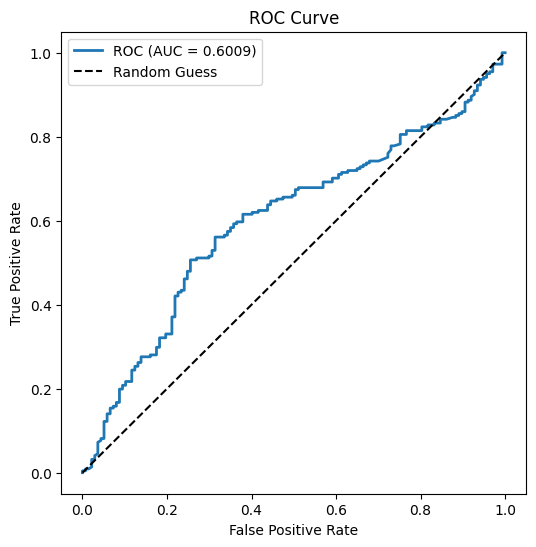

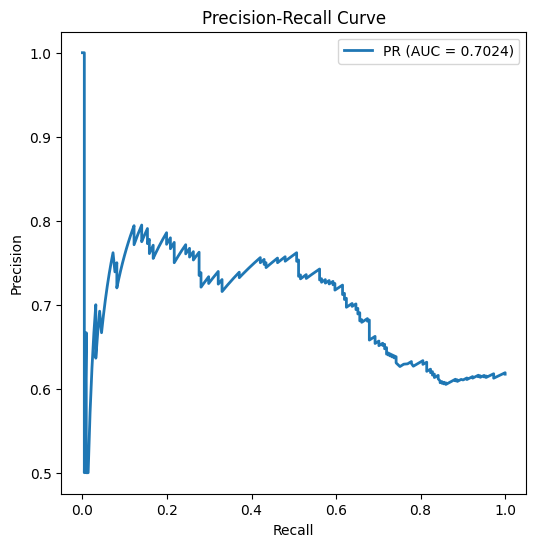

In [212]:
from my_krml_25552249.models.performance import report_and_conf_matrix, plot_roc, plot_pr
# Get predicted probabilities for the positive class
y_probs = final_model.predict_proba(X_test)[:, 1]

plot_roc(y_test, y_probs)
plot_pr(y_test, y_probs)


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.55      0.52       137
           1       0.70      0.65      0.67       221

    accuracy                           0.61       358
   macro avg       0.60      0.60      0.60       358
weighted avg       0.62      0.61      0.62       358



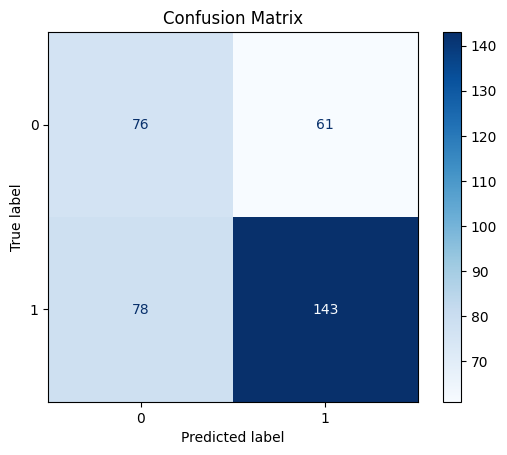

In [213]:
from my_krml_25552249.models.performance import report_and_conf_matrix, plot_roc
report_and_conf_matrix(y_test, y_pred)

Adjust based on best threshold

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

# Predicted probabilities for positive class
y_probs = final_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Find threshold that maximizes F1
f1_scores = [f1_score(y_test, (y_probs >= thr).astype(int)) for thr in thresholds]
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Final predictions using this threshold
y_pred_final = (final_model.predict_proba(X_test)[:, 1] >= best_threshold).astype(int)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.01       137
           1       0.62      1.00      0.76       221

    accuracy                           0.62       358
   macro avg       0.81      0.50      0.39       358
weighted avg       0.76      0.62      0.48       358



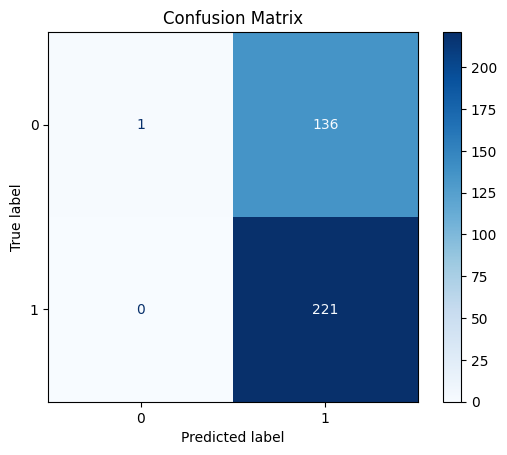

In [121]:
from my_krml_25552249.models.performance import report_and_conf_matrix, plot_roc
report_and_conf_matrix(y_test, y_pred_final)

In [ ]:
# <Student to fill this section>
model_performance_explanations = """
Provide some explanations on model performance
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier. Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [ ]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [ ]:
# <Student to fill this section>
experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.
Given the results achieved and the overall objective of the project, list the potential next steps and experiments. For each of them assess the expected uplift or gains and rank them accordingly. If the experiment achieved the required outcome for the business, recommend the steps to deploy this solution into production.
"""

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)